In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)
conn = engine.connect()


# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores


In [11]:
#measure_all = session.query(Measurement)
#for measurement in measure_all:
#  print(measurement.date, measurement.prcp)

In [12]:
#latest_date
measurement_df = pd.read_sql("SELECT date FROM Measurement", conn)
#measurement_df.head()
latest_date= measurement_df['date'].max()
print(latest_date)

2017-08-23


In [15]:
from datetime import timedelta
earliest_date = pd.to_datetime(latest_date) - timedelta(days=365)         #'2016-08-23'
 
print(str(earliest_date))
#print(earliest_date)

2016-08-23 00:00:00


In [16]:
measure_all = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= str(earliest_date)).filter(Measurement.date <= latest_date)
for measurement in measure_all:
    print(measurement)
    #print(measurement.date, measurement.prcp)


('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('2016-10-11', 0.0)
('

('2017-03-09', None)
('2017-03-10', 0.0)
('2017-03-11', 0.0)
('2017-03-12', 0.0)
('2017-03-13', 0.0)
('2017-03-14', 0.0)
('2017-03-15', 0.0)
('2017-03-16', 0.0)
('2017-03-17', 0.35)
('2017-03-18', 0.0)
('2017-03-19', 0.0)
('2017-03-20', 0.0)
('2017-03-21', 0.0)
('2017-03-22', 0.0)
('2017-03-23', 0.02)
('2017-03-24', 0.07)
('2017-03-25', 0.43)
('2017-03-26', 0.0)
('2017-03-27', 0.0)
('2017-03-28', 0.0)
('2017-03-29', 0.08)
('2017-03-30', 0.0)
('2017-03-31', 0.0)
('2017-04-01', 0.0)
('2017-04-02', 0.0)
('2017-04-03', 0.0)
('2017-04-04', 0.0)
('2017-04-05', 0.0)
('2017-04-06', 0.0)
('2017-04-07', 0.0)
('2017-04-09', None)
('2017-04-10', 0.0)
('2017-04-11', 0.0)
('2017-04-12', 0.0)
('2017-04-13', 0.0)
('2017-04-14', 0.36)
('2017-04-15', 0.0)
('2017-04-16', 0.0)
('2017-04-17', 0.3)
('2017-04-18', 0.15)
('2017-04-19', 0.0)
('2017-04-20', 0.35)
('2017-04-21', 2.36)
('2017-04-24', None)
('2017-04-25', 0.0)
('2017-04-26', 0.01)
('2017-04-27', 0.0)
('2017-04-28', 0.0)
('2017-04-29', 6.25)
('2017

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
measurement_df= pd.DataFrame([(d.date, d.prcp) for d in measure_all], columns=['date', 'prcp'])
measurement_df.set_index('date', inplace=True, drop=True)
measurement_df.sort_values(by=['date'])

prcp
date            
2016-08-24  0.08
2016-08-24   NaN
2016-08-24  2.15
2016-08-24  2.28
2016-08-24  2.15
2016-08-24  1.45
2016-08-24  1.22
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.06
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.11
2016-08-25  0.08
2016-08-26  0.02
2016-08-26  0.03
2016-08-26  0.01
2016-08-26  0.00
2016-08-26  0.04
2016-08-26  0.00
2016-08-27  0.12
2016-08-27  0.00
2016-08-27  0.18
2016-08-27   NaN
2016-08-27  0.00
2016-08-27  0.02
2016-08-28  0.14
2016-08-28  0.60
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-08-16  0.42
2017-08-16  0.00
2017-08-16  0.07
2017-08-16  0.12
2017-08-17  0.13
2017-08-17  0.00
2017-08-17  0.05
2017-08-17  0.01
2017-08-18  0.00
2017-08-18   NaN
2017-08-18  0.06
2017-08-18  0.00
2017-08-19  0.09
2017-08-19   NaN
2017-08-19  0.00
2017-08-19  0.00
2017-08-20   NaN
2017-08-20  0.00
2017-08-20  0.01
2017-08-21  0.56
2017-08-21  0.02
2017-08-21  0.00
2017-08-21   NaN
2017-08-22  0.50
2017-08-22  0.00
2017-08-22  0.00
2017-08-23  0.08
2017-08-23  0.00
2017-08-23  0.00
2017-08-23  0.45

[2223 rows x 1 columns]

In [18]:
#print(measurement_df)

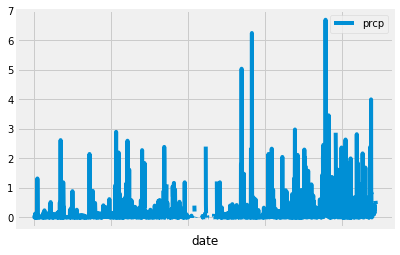

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data
measurement_df.plot()


In [20]:
plt.savefig("Images\Precipitation.png")


<Figure size 432x288 with 0 Axes>

##![precipitation](Images/precipitation.png)

In [21]:
measurement_df.describe(percentiles=None, include='all')

prcp
count  2015.000000
mean      0.176462
std       0.460288
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000

In [22]:
### Station Analysis
total_measurements_count = session.query(func.count(Measurement.station)).all()
print(total_measurements_count)

[(19550,)]


In [23]:
stations_number = session.query(Station).distinct(Station.station).group_by(Station.station).count()
print(stations_number)

9


In [24]:
from sqlalchemy import desc
from sqlalchemy import func

In [25]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_activity = session.query(Measurement.station,func.count(Measurement.station).label('activity')).\
group_by(Measurement.station).order_by(desc('activity'))
for count in station_activity:
    print(count)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [26]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

In [27]:
most_active = station_activity[0].station
print(most_active)

USC00519281


In [28]:
session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.station == most_active).all()


[(54.0, 71.66378066378067, 85.0)]

In [29]:
measure_most_active_12m = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= str(earliest_date)).filter(Measurement.date <= latest_date).\
    filter(Measurement.station == most_active).all()
for measurement in measure_most_active_12m:
     print(measure_most_active_12m)

[('2016-08-24', 77.0), ('2016-08-25', 80.0), ('2016-08-26', 80.0), ('2016-08-27', 75.0), ('2016-08-28', 73.0), ('2016-08-29', 78.0), ('2016-08-30', 77.0), ('2016-08-31', 78.0), ('2016-09-01', 80.0), ('2016-09-02', 80.0), ('2016-09-03', 78.0), ('2016-09-04', 78.0), ('2016-09-05', 78.0), ('2016-09-06', 73.0), ('2016-09-07', 74.0), ('2016-09-08', 80.0), ('2016-09-09', 79.0), ('2016-09-10', 77.0), ('2016-09-11', 80.0), ('2016-09-12', 76.0), ('2016-09-13', 79.0), ('2016-09-14', 75.0), ('2016-09-15', 79.0), ('2016-09-16', 78.0), ('2016-09-17', 79.0), ('2016-09-18', 78.0), ('2016-09-19', 78.0), ('2016-09-20', 76.0), ('2016-09-21', 74.0), ('2016-09-22', 77.0), ('2016-09-23', 78.0), ('2016-09-24', 79.0), ('2016-09-25', 79.0), ('2016-09-26', 77.0), ('2016-09-27', 80.0), ('2016-09-28', 78.0), ('2016-09-29', 78.0), ('2016-09-30', 78.0), ('2016-10-01', 77.0), ('2016-10-02', 79.0), ('2016-10-03', 79.0), ('2016-10-04', 79.0), ('2016-10-05', 79.0), ('2016-10-06', 75.0), ('2016-10-07', 76.0), ('2016-10

[('2016-08-24', 77.0), ('2016-08-25', 80.0), ('2016-08-26', 80.0), ('2016-08-27', 75.0), ('2016-08-28', 73.0), ('2016-08-29', 78.0), ('2016-08-30', 77.0), ('2016-08-31', 78.0), ('2016-09-01', 80.0), ('2016-09-02', 80.0), ('2016-09-03', 78.0), ('2016-09-04', 78.0), ('2016-09-05', 78.0), ('2016-09-06', 73.0), ('2016-09-07', 74.0), ('2016-09-08', 80.0), ('2016-09-09', 79.0), ('2016-09-10', 77.0), ('2016-09-11', 80.0), ('2016-09-12', 76.0), ('2016-09-13', 79.0), ('2016-09-14', 75.0), ('2016-09-15', 79.0), ('2016-09-16', 78.0), ('2016-09-17', 79.0), ('2016-09-18', 78.0), ('2016-09-19', 78.0), ('2016-09-20', 76.0), ('2016-09-21', 74.0), ('2016-09-22', 77.0), ('2016-09-23', 78.0), ('2016-09-24', 79.0), ('2016-09-25', 79.0), ('2016-09-26', 77.0), ('2016-09-27', 80.0), ('2016-09-28', 78.0), ('2016-09-29', 78.0), ('2016-09-30', 78.0), ('2016-10-01', 77.0), ('2016-10-02', 79.0), ('2016-10-03', 79.0), ('2016-10-04', 79.0), ('2016-10-05', 79.0), ('2016-10-06', 75.0), ('2016-10-07', 76.0), ('2016-10

In [30]:
most_active_12m_df = pd.DataFrame([(m.date, m.tobs) for m in measure_most_active_12m], columns=['date','tobs'])
most_active_12m_df.sort_values(by=['date'])

date  tobs
0    2016-08-24  77.0
1    2016-08-25  80.0
2    2016-08-26  80.0
3    2016-08-27  75.0
4    2016-08-28  73.0
5    2016-08-29  78.0
6    2016-08-30  77.0
7    2016-08-31  78.0
8    2016-09-01  80.0
9    2016-09-02  80.0
10   2016-09-03  78.0
11   2016-09-04  78.0
12   2016-09-05  78.0
13   2016-09-06  73.0
14   2016-09-07  74.0
15   2016-09-08  80.0
16   2016-09-09  79.0
17   2016-09-10  77.0
18   2016-09-11  80.0
19   2016-09-12  76.0
20   2016-09-13  79.0
21   2016-09-14  75.0
22   2016-09-15  79.0
23   2016-09-16  78.0
24   2016-09-17  79.0
25   2016-09-18  78.0
26   2016-09-19  78.0
27   2016-09-20  76.0
28   2016-09-21  74.0
29   2016-09-22  77.0
..          ...   ...
321  2017-07-11  72.0
322  2017-07-12  74.0
323  2017-07-13  74.0
324  2017-07-14  76.0
325  2017-07-15  80.0
326  2017-07-16  80.0
327  2017-07-17  76.0
328  2017-07-18  76.0
329  2017-07-19  76.0
330  2017-07-20  77.0
331  2017-07-21  77.0
332  2017-07-22  77.0
333  2017-07-23  82.0
334  2017-07-24  75.0
335  2017-07-25  77.0
336  2017-07-26  75.0
337  2017-07-27  76.0
338  2017-07-28  81.0
339  2017-07-29  82.0
340  2017-07-30  81.0
341  2017-07-31  76.0
342  2017-08-04  77.0
343  2017-08-05  82.0
344  2017-08-06  83.0
345  2017-08-13  77.0
346  2017-08-14  77.0
347  2017-08-15  77.0
348  2017-08-16  76.0
349  2017-08-17  76.0
350  2017-08-18  79.0

[351 rows x 2 columns]

([<matplotlib.axis.XTick at 0x18fddfcfc88>,
 <a list of 12 Text xticklabel objects>)

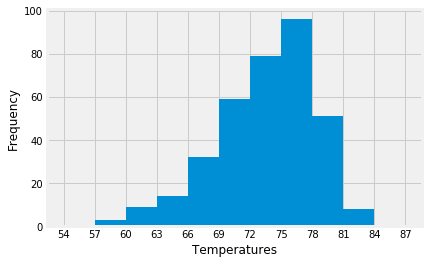

In [31]:
step = (90-54)/12
start = 54
bins = []
n = 0
while n < 12:
    bins.append( start + step *n)
    n += 1
plt.xlabel('Temperatures')
plt.ylabel('Frequency')
plt.hist(most_active_12m_df.tobs, bins=bins)
plt.xticks(bins)

In [32]:
plt.savefig("Images\station-histogram.png")


<Figure size 432x288 with 0 Axes>

In [33]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

   # filter(Measurement.date >= str(earliest_date)).filter(Measurement.date <= latest_date)

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [34]:
plot_data = calc_temps(str(earliest_date), latest_date)
print(plot_data)

[(58.0, 74.57894736842105, 87.0)]


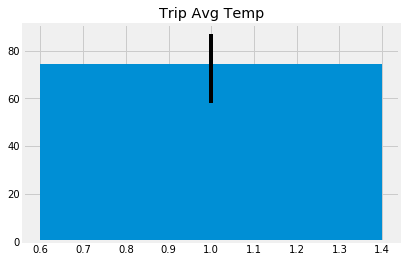

<Figure size 432x288 with 0 Axes>

In [35]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
temp_avg = plot_data[0][1]
temp_min = plot_data[0][0]
temp_max = plot_data[0][2]

asimmetric_errors = [[temp_avg-temp_min],[temp_max-temp_avg]]
rects1 = plt.bar(1, temp_avg, yerr=asimmetric_errors)
plt.title('Trip Avg Temp')
plt.show()
plt.savefig("Images\Trip_Avg_Temp.png")


In [36]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [37]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [38]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [39]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [40]:
# Plot the daily normals as an area plot with `stacked=False`
